# How to calibrate a 2D magnetometer the simplest way possible

## Step 1: Load uncalibrated magnetometer data as CSV

The data was recorded by logging data from the magnetometer.

Take care! This calibration process should be done while all systems of your robot or solution are running, so in a real life environment. This will make sure we take all hard iron influences into consideration. Place the robot in the middle of a room and let your robot turn to the left and to the right for a minute, and record the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

rawdata = pd.read_csv('mag_out.csv')

## Step 2: Visualize the data to see what is going on

The easiest way is to plot the data on the x/y plane as a scatter plot. Every point represents a measurement of the magnetic field. We should see a perfect circle here, centered at (0,0).

Due due hard iron effects, we do not see a circle, but an ellipse. It also seems not to be centered at (0,0).

Goal of the calibration procedure is to find a way to transform the measurements back into a circle.

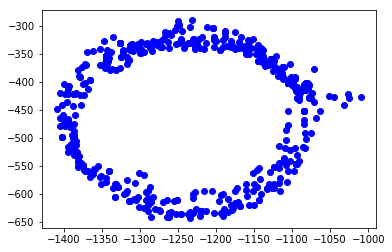

In [2]:
plt.scatter(rawdata["x"], rawdata["y"], label='Data Points', color='b')
plt.show()

## Step 3: Find the hard iron offsets

We take the easy way of calibration. We compute a bounding rectangle around all data points and compute its center. The computed center can be used to translate the data points back to the desired origin (0,0). We can also use the width and the height of the rectangle to scale the data to a quadratic shape.

Take care! Simplicity comes with a cost. The bounding rectangle might also include unwanted sensor noise, so it might not be the most precise way to find the offsets. 

In [3]:
xcol = rawdata["x"]
ycol = rawdata["y"]

xmin = xcol.min()
xmax = xcol.max()

ymin = ycol.min()
ymax = ycol.max()

hardiron_x = (xmin + xmax) / 2
hardiron_y = (ymin + ymax) / 2

width = xmax - xmin
height = ymax - ymin
xyratio = width / height

[hardiron_x, hardiron_y, xyratio, width, height]

[-1209.3400000000001,
 -466.44000000000005,
 1.1328125,
 400.20000000000005,
 353.28000000000003]

## Step 4: Apply hard iron offsets to data

We apply the found hard iron offsets and scale factors to the data points to make it the best circle we can.

In [4]:
def correctdata(row):
    x = row["x"] - hardiron_x
    y = (row["y"] - hardiron_y) * xyratio
    return [x, y]

res = rawdata.apply(correctdata, axis=1, result_type='expand')
rawdata["xcorrected"] = res[0]
rawdata["ycorrected"] = res[1]

## Finally, the corrected data

Here we are, this is the result when the calibration is applied. The center of the circle is at (0,0). There is also a green circle in the background showing the layout of a perfect circle to see the difference.

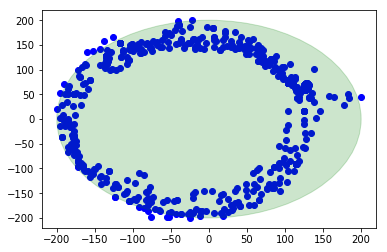

In [5]:
circle = plt.Circle((0, 0), width / 2, color='g', alpha=0.2)

fig, ax = plt.subplots()
ax.add_patch(circle)
ax.scatter(rawdata["xcorrected"], rawdata["ycorrected"], label='Data Points', color='b')

plt.show()

# Summary

## Pros

- Easy to implement
- Easy to understand

## Cons

- Sensor noise and outliers are not well handled during the box fitting
- Directional offsets are not corrected
- We need a full set of 360 degrees data points for calibration